In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions

from collections import Counter
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

In [64]:
forest_fire = pd.read_csv('forestfires.csv')
pd.set_option('display.max_columns', 31)
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [65]:
fire_data = forest_fire.drop(forest_fire.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1)

In [66]:
fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


# Data Exploration

In [67]:
fire_data.shape

(517, 12)

In [68]:
fire_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [69]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [70]:
fire_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

# Types of variables

In [71]:
# List of Numerical Variables
numerical_features = [feature for feature in fire_data.columns if fire_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
fire_data[numerical_features].head()

Number of numerical variables: 9


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [72]:
discrete_feature = [feature for feature in numerical_features if len(fire_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 2


In [73]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [74]:
categorical = [var for var in fire_data.columns if fire_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [75]:
fire_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


# Data Visualization

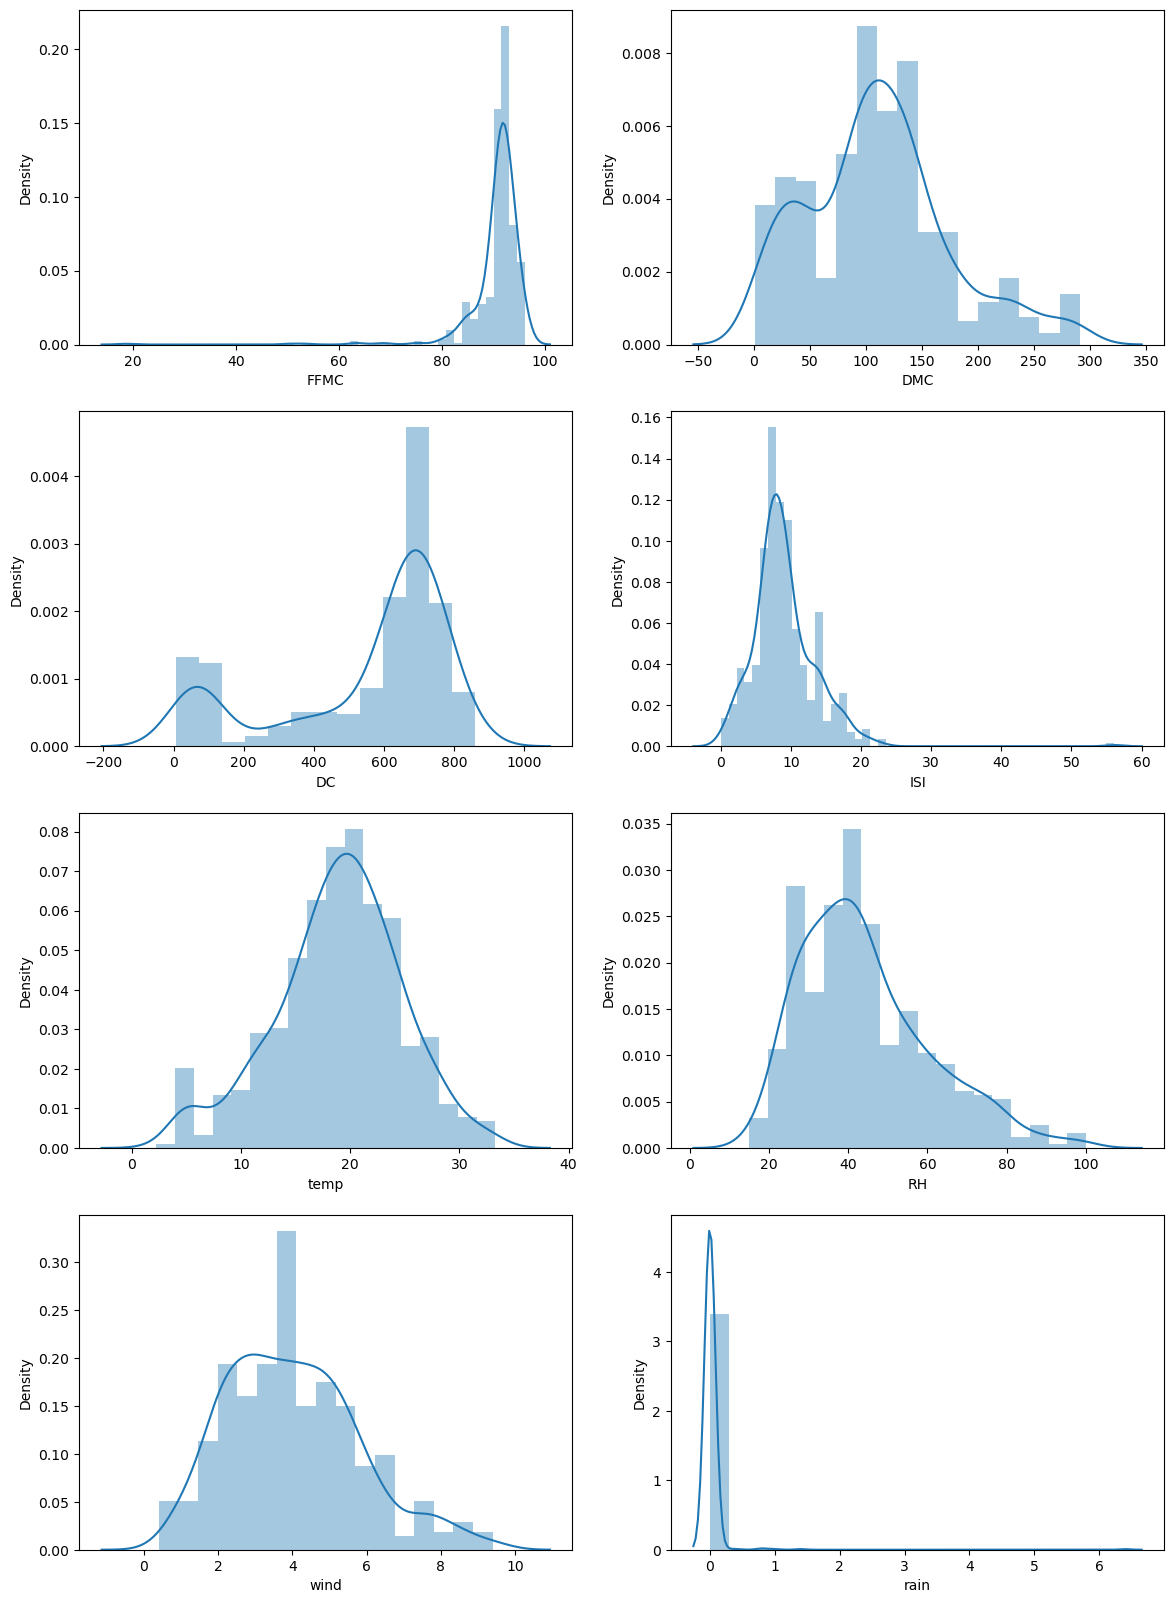

In [76]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(fire_data.FFMC, ax = ax[0,0])
sns.distplot(fire_data.DMC, ax = ax[0,1])
sns.distplot(fire_data.DC, ax = ax[1,0])
sns.distplot(fire_data.ISI, ax = ax[1,1])
sns.distplot(fire_data.temp, ax = ax[2,0])
sns.distplot(fire_data.RH, ax = ax[2,1])
sns.distplot(fire_data.wind, ax = ax[3,0])
sns.distplot(fire_data.rain, ax = ax[3,1])

plt.show()

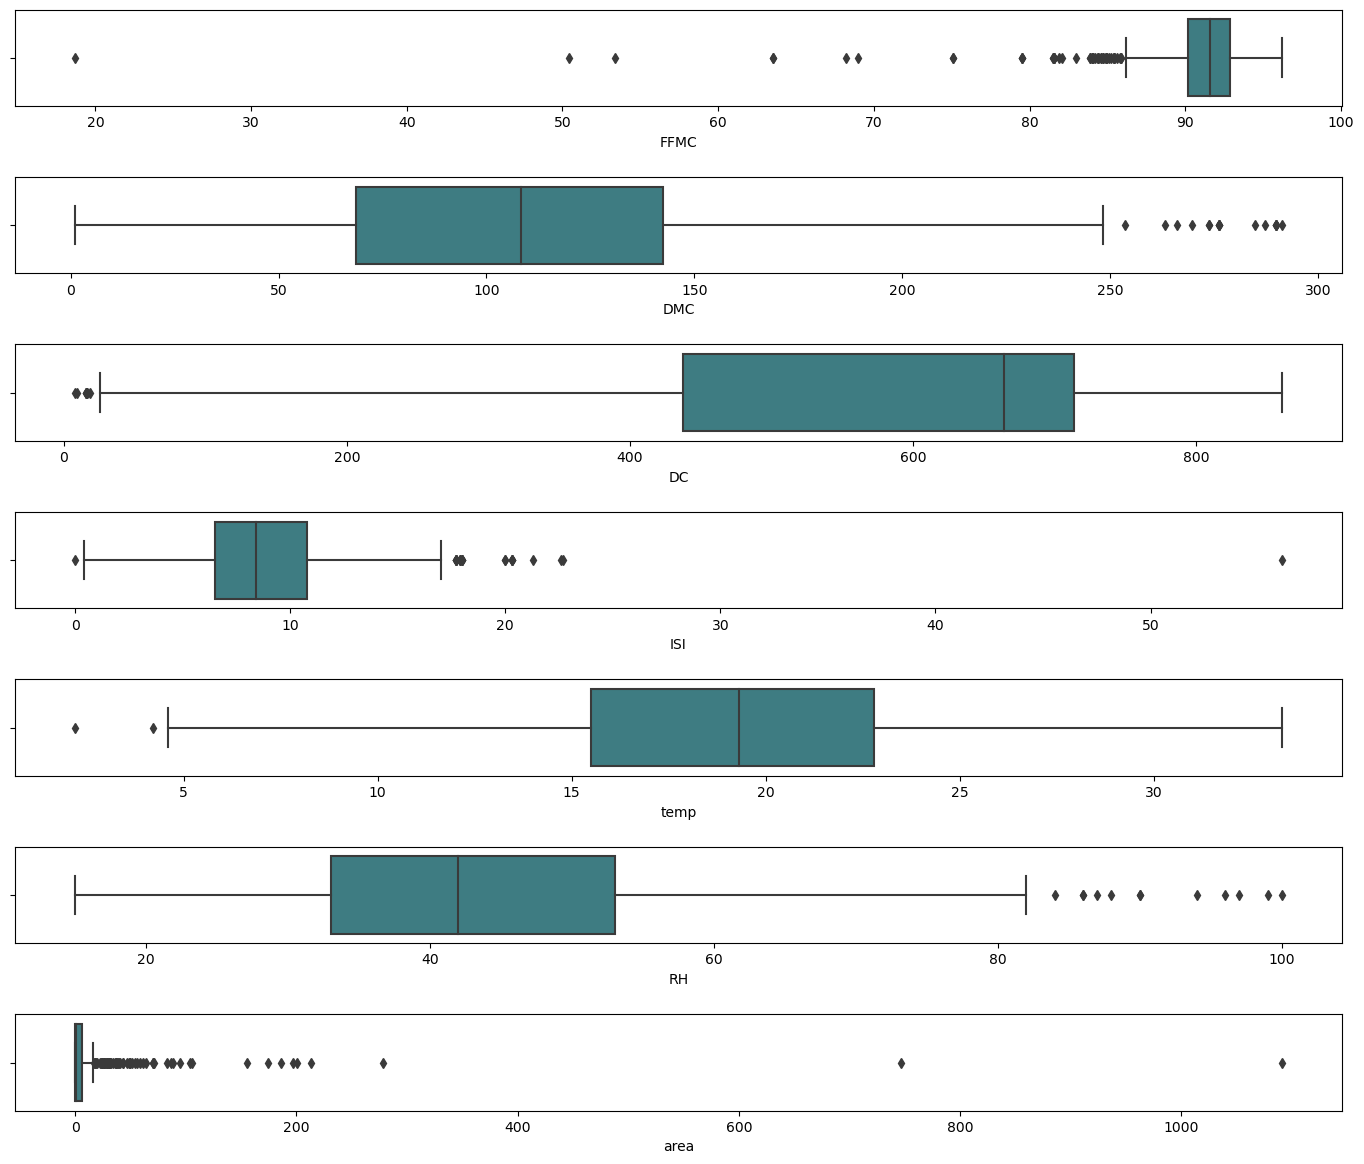

In [77]:
outlier = fire_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

In [78]:
print(fire_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df = fire_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


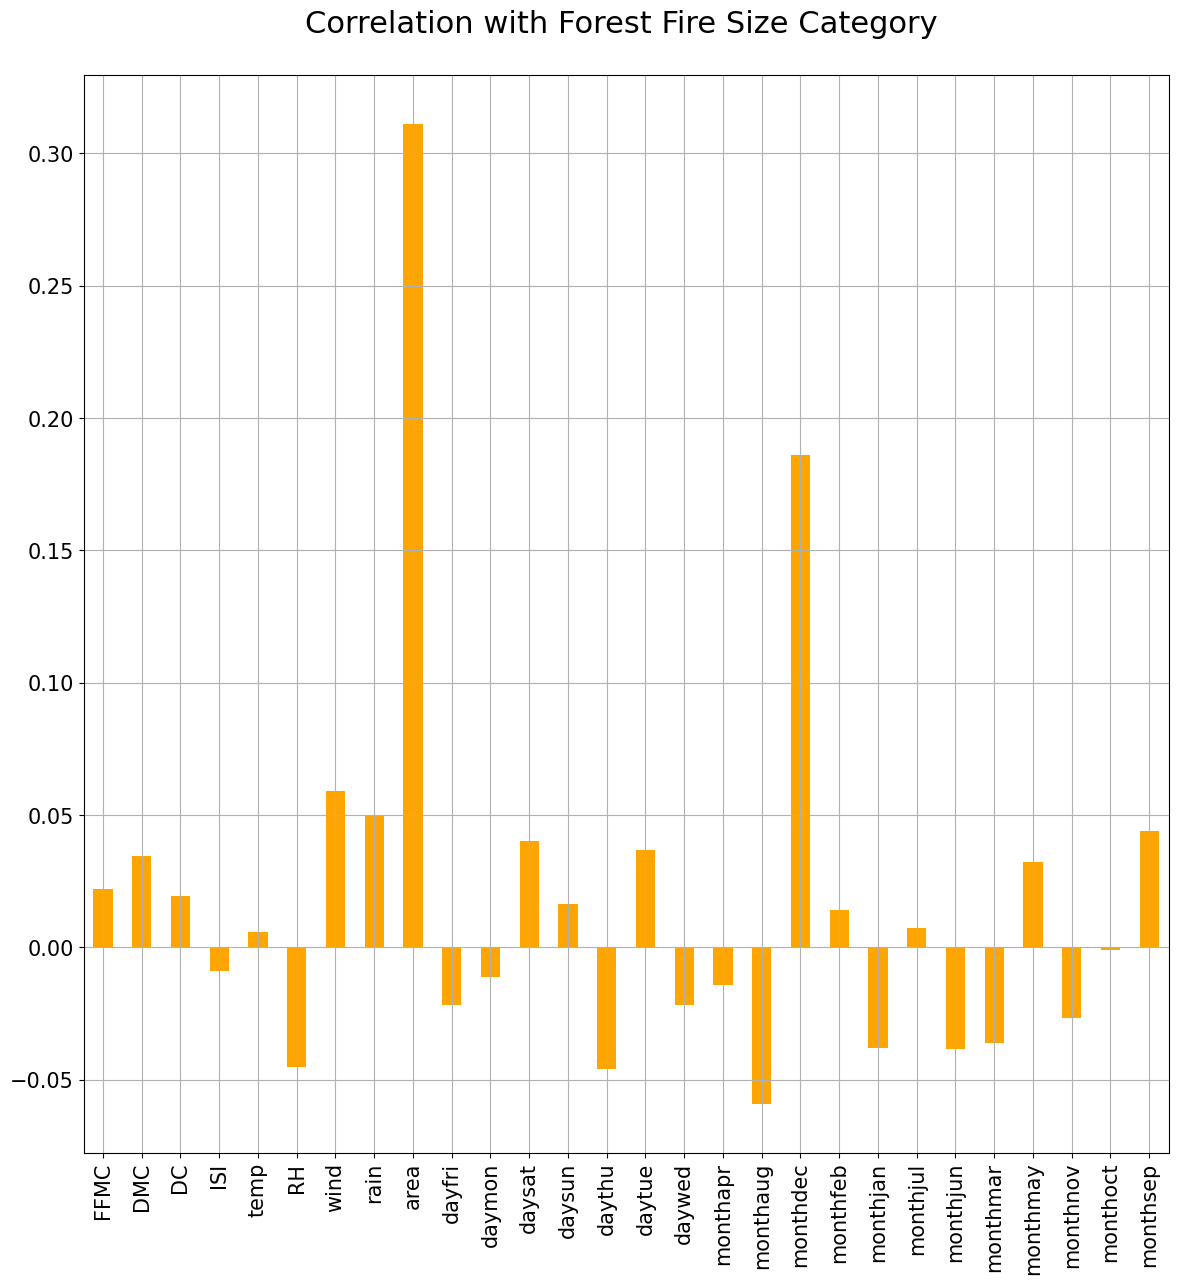

In [79]:
df = fire_data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = forest_fire.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize= (14,14), fontsize = 15, color = 'orange', rot = 90, grid = True)
plt.title('Correlation with Forest Fire Size Category \n', horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif");

In [80]:
fire_data.size_category.unique()

array(['small', 'large'], dtype=object)

In [81]:
countsizesmall = len(fire_data[fire_data.size_category == 'small'])
countsizelarge = len(fire_data[fire_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(fire_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(fire_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [82]:
fire_data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

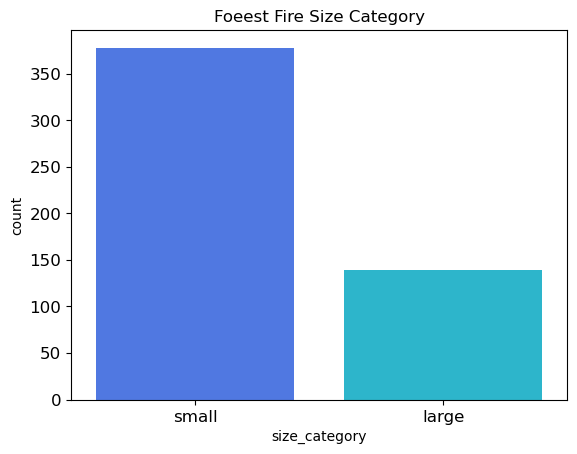

In [83]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data= fire_data, palette = pal, order= fire_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Foeest Fire Size Category');

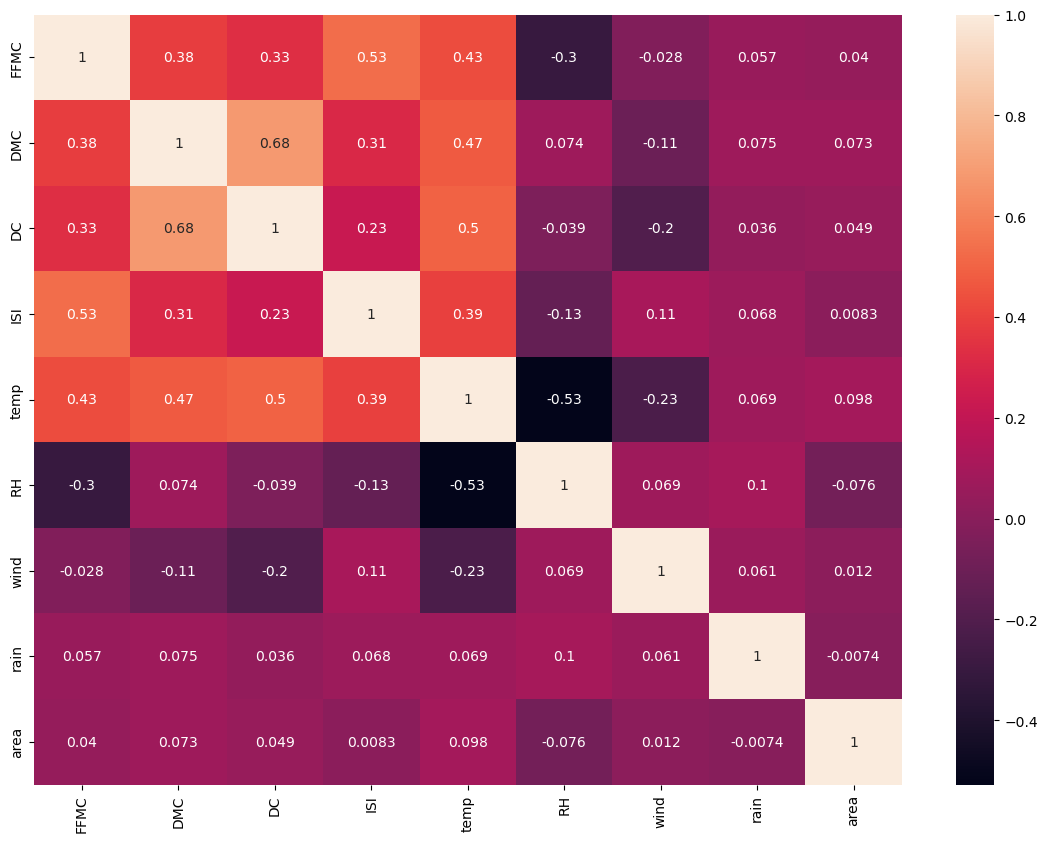

In [84]:
fig= plt.figure(figsize=(14,10))
sns.heatmap(fire_data.corr(), annot=True);
plt.xticks(rotation=90);

# Feature Engineering

In [85]:
continuous_feature=[feature for feature in fire_data.columns if fire_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 9


In [86]:
fire_data[continuous_feature]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [87]:
df_standard_scaled = fire_data.copy()
features = df_standard_scaled[continuous_feature]

In [88]:
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


In [89]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))

Mean
 FFMC   -0.0
DMC     0.0
DC      0.0
ISI    -0.0
temp    0.0
RH      0.0
wind   -0.0
rain   -0.0
area   -0.0
dtype: float64


In [90]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [91]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
df['size_category'] = fire_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [92]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
df['size_category'] = fire_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [93]:
df.size_category.unique()

array([0, 1])

# Feature Selection Technique

In [94]:
forest_fire.drop(['month','day','area'] ,axis=1, inplace= True)

In [95]:
data1 = forest_fire.copy()
data1.drop('size_category',axis=1, inplace =True)
data1 = pd.get_dummies(data1.iloc[:,:-1])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [96]:
data1['size_category'] = df1.size_category
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,small


In [97]:
le = LabelEncoder()
le.fit(data1["size_category"])
data1["size_category"]=le.transform(data1["size_category"])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Split into input (X) and output (y) variables

In [98]:
X = data1.drop('size_category', axis = 1)
y=  data1.size_category

In [99]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [100]:
scores = fit.scores_
features = fit.transform(X)
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


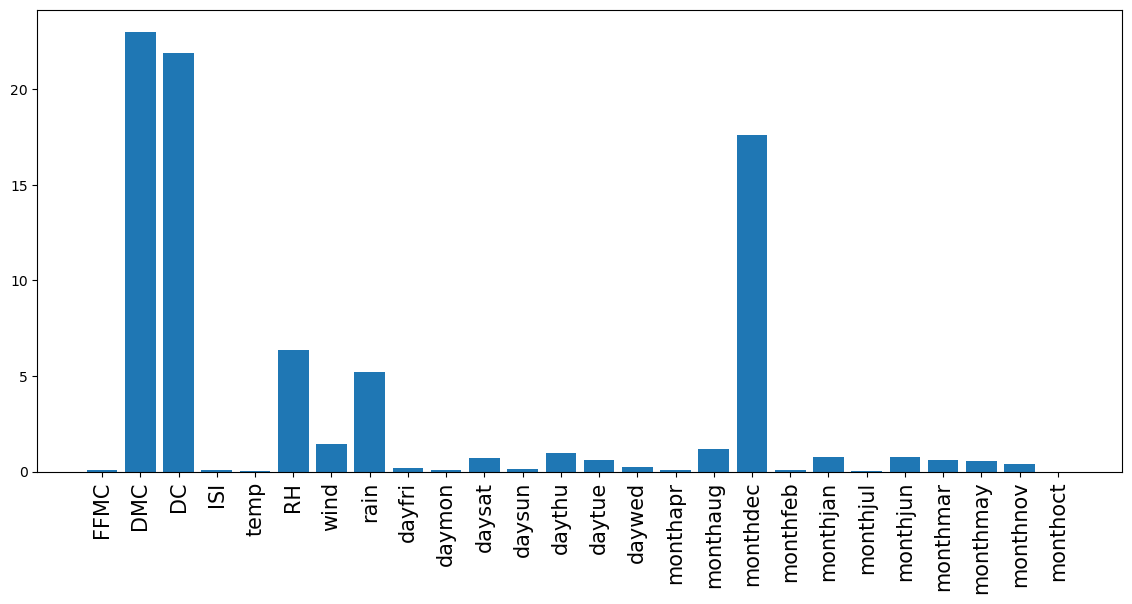

In [101]:
fig, axes = plt.subplots(figsize=(14,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

In [102]:
model_data=df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.073268,-0.736124,-0.100753,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.846648,0.474768,1.638592,-0.073268,0.995798,0.651674,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.846648,0.474768,1.577248,-0.073268,1.498614,-0.026532,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.549003,0.269382,-0.140366,-0.073268,-0.009834,-0.202020,0,1,0,0,0,0,0,0,0,0,0,0,0


In [103]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

# Hyperparameter Tuning
### Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [105]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [106]:
tuner = RandomSearch(build_model, objective= 'val_accuracy', max_trials= 5, 
                     executions_per_trial=3, directory= 'project', project_name= 'Forest Fire')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [108]:
tuner.results_summary()

Results summary
Results in project\Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 6
units_0: 32
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.8910256425539652

Trial 1 summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 96
learning_rate: 0.0001
units_2: 96
units_3: 64
units_4: 32
units_5: 32
units_6: 32
units_7: 32


### Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [110]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam = Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [111]:
model1 = KerasClassifier(build_fn= create_model, verbose=0)
batch_size = [10,20,40,50]
epochs = [10,50,100,200]
param_grid = dict(batch_size= batch_size, epochs=epochs)
grid = GridSearchCV(estimator= model1, param_grid= param_grid, cv= KFold(), verbose= 10)

In [113]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.906 total time=   1.3s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   1.3s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.903 total time=   1.2s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   1.3s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.935 total time=   1.3s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 3/5; 9/16] END ....batch_size=40, epochs=10;, score=0.742 total time=   0.8s
[CV 4/5; 9/16] START batch_size=40, epochs=10...................................
[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.903 total time=   0.8s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................
[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.774 total time=   0.9s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................
[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=0.844 total time=   1.9s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................
[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=0.968 total time=   1.2s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................
[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=0.935 total time=   1.3s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................
[CV 4/5; 10/16] END ...batch

In [114]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{}, {} with {}".format(mean,stdev,param))

Best 0.9618951559066773, using {'batch_size': 50, 'epochs': 50}
0.9425403118133545, 0.037011210892472376 with {'batch_size': 10, 'epochs': 10}
0.942943525314331, 0.04959676265716553 with {'batch_size': 10, 'epochs': 50}
0.94919353723526, 0.04233678433220251 with {'batch_size': 10, 'epochs': 100}
0.9618951439857483, 0.030498904904173816 with {'batch_size': 10, 'epochs': 200}
0.9296370863914489, 0.03722146397634167 with {'batch_size': 20, 'epochs': 10}
0.9556451439857483, 0.04221371222927085 with {'batch_size': 20, 'epochs': 50}
0.9556451439857483, 0.04221371222927085 with {'batch_size': 20, 'epochs': 100}
0.94294353723526, 0.053629026870083876 with {'batch_size': 20, 'epochs': 200}
0.8399193406105041, 0.08368853124108405 with {'batch_size': 40, 'epochs': 10}
0.917137086391449, 0.04198391570563599 with {'batch_size': 40, 'epochs': 50}
0.94919353723526, 0.04233678433220251 with {'batch_size': 40, 'epochs': 100}
0.9362903118133545, 0.03387095701126977 with {'batch_size': 40, 'epochs': 200}

### Hyperparameter Tuning: Optimal Droupout rate

In [115]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [116]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [117]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.875 total time=   3.6s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   3.5s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   3.2s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=1.000 total time=   3.3s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   3.2s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END .............dropout_rate=0.1;,

In [118]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9556451439857483, using {'dropout_rate': 0.0}
0.9556451439857483,0.04221371222927085 with {'dropout_rate': 0.0}
0.94919353723526,0.04233678433220251 with {'dropout_rate': 0.1}
0.94919353723526,0.051233487175148834 with {'dropout_rate': 0.2}
0.94919353723526,0.04233678433220251 with {'dropout_rate': 0.3}
0.9427419185638428,0.03610164807752721 with {'dropout_rate': 0.4}
0.9493951439857483,0.05427993920407009 with {'dropout_rate': 0.5}


### Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [119]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam = Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy', optimizer = adam, metrics=["accuracy"])
    return model3

In [120]:
model3 = KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
param_grid = dict(activation_function= activation_function, init= init)
grid3 = GridSearchCV(estimator= model3, param_grid= param_grid, cv= KFold(), verbose=10) 

In [121]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.875 total time=   3.8s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=0.935 total time=   3.5s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   3.1s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   3.2s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   3.9s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform..............

In [122]:
print('Best {}, using {}'.format(grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean, stdev, param))

Best 0.9620967626571655, using {'activation_function': 'tanh', 'init': 'normal'}
0.9427419185638428,0.03610164807752721 with {'activation_function': 'softmax', 'init': 'normal'}
0.9362903118133545,0.03387095701126977 with {'activation_function': 'softmax', 'init': 'uniform'}
0.94919353723526,0.04233678433220251 with {'activation_function': 'softmax', 'init': 'zero'}
0.9620967626571655,0.04587568455888755 with {'activation_function': 'tanh', 'init': 'normal'}
0.9620967626571655,0.04587568455888755 with {'activation_function': 'tanh', 'init': 'uniform'}
0.9618951439857483,0.030498904904173816 with {'activation_function': 'tanh', 'init': 'zero'}
0.9491935253143311,0.03709676265716553 with {'activation_function': 'relu', 'init': 'normal'}
0.94919353723526,0.04233678433220251 with {'activation_function': 'relu', 'init': 'uniform'}
0.9620967626571655,0.04587568455888755 with {'activation_function': 'relu', 'init': 'zero'}


## Building Neural Networks Model using Optimal Values

In [123]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    # Defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20 ]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Create ANN model
            model = Sequential()
            
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
            # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8448753356933594
batch_size: 5 - epochs: 10 Accuracy: 0.9418282508850098
batch_size: 5 - epochs: 50 Accuracy: 0.9833794832229614
batch_size: 5 - epochs: 100 Accuracy: 0.9806094169616699
batch_size: 10 - epochs: 5 Accuracy: 0.7728531956672668
batch_size: 10 - epochs: 10 Accuracy: 0.8587257862091064
batch_size: 10 - epochs: 50 Accuracy: 0.9916897416114807
batch_size: 10 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 15 - epochs: 5 Accuracy: 0.761772871017456
batch_size: 15 - epochs: 10 Accuracy: 0.8088642954826355
batch_size: 15 - epochs: 50 Accuracy: 0.9916897416114807
batch_size: 15 - epochs: 100 Accuracy: 0.9972299337387085
batch_size: 20 - epochs: 5 Accuracy: 0.7534626126289368
batch_size: 20 - epochs: 10 Accuracy: 0.7867035865783691
batch_size: 20 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 20 - epochs: 100 Accuracy: 0.9972299337387085


## Training Model - using best params

In [124]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
    
# The output neuron is a single fully connected node Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.6876 - accuracy: 0.7303 - val_loss: 0.6827 - val_accuracy: 0.7000
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.7635 - val_loss: 0.6604 - val_accuracy: 0.7250
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.7676 - val_loss: 0.6204 - val_accuracy: 0.7333
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5709 - accuracy: 0.7759 - val_loss: 0.5872 - val_accuracy: 0.7250
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.7759 - val_loss: 0.5688 - val_accuracy: 0.7250
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7842 - val_loss: 0.5559 - val_accuracy: 0.7333
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7925 - val_loss: 0.5447 - val_accuracy: 0.7500
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9917 - val_loss: 0.3086 - val_accuracy: 0.9167
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9959 - val_loss: 0.2979 - val_accuracy: 0.9333
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9917 - val_loss: 0.3153 - val_accuracy: 0.9167
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.3031 - val_accuracy: 0.9333
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9959 - val_loss: 0.2989 - val_accuracy: 0.9333
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9959 - val_loss: 0.3130 - val_accuracy: 0.9333
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9959 - val_loss: 0.3047 - val_accuracy: 0.9417
Epoch 

## Model Evaluation Train and Test Error

In [125]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9787
accuracy: 97.87%


In [126]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Predicting values from Model using same dataset

In [129]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 2ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
493,1,0.997030,1
298,0,0.001849,0
93,0,0.002160,0
437,0,0.002665,0
340,0,0.017402,0
7,0,0.002217,0
172,0,0.005629,0
76,0,0.002368,0
148,0,0.002583,0
104,0,0.001890,0


In [130]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 2ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
115,0,0.002843,0
130,0,0.002471,0
413,0,0.002479,0
350,0,0.010466,0
103,0,0.002054,0
511,0,0.002177,0
325,0,0.002108,0
473,1,0.997030,1
265,0,0.002256,0
226,1,0.997030,1


## Classification Report

In [131]:
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  98.0 %
Confusion Matrix for Test Data  =
 [[112   2]
 [  1  41]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       0.95      0.98      0.96        42

    accuracy                           0.98       156
   macro avg       0.97      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [135]:
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  98.0 %
Confusion Matrix for Train Data  =
 [[261   3]
 [  5  92]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       264
           1       0.97      0.95      0.96        97

    accuracy                           0.98       361
   macro avg       0.97      0.97      0.97       361
weighted avg       0.98      0.98      0.98       361



In [136]:
# print the scores on training and test set
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score : {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score     : {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

12/12 [==============================] - 0s 2ms/step
Training set score : 97.78%
Test set score     : 98.08%
